In [1]:
%pylab inline
import os
import random
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy.misc import imread

In [3]:
!pwd


/home/deepak/Saquib/CNNs


In [4]:
!ls


Age_detection.ipynb
Age_detection_sub1.csv
Age_detection_sub2.csv
Converting MNIST images to RGB.ipynb
data
first_try.h5
mnist.pkl.gz
Rough Notebook.ipynb
sub1.csv
sub2.csv
sub3.csv
Transfer Learning.ipynb
vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5


In [5]:
!cd data

In [6]:
!ls


Age_detection.ipynb
Age_detection_sub1.csv
Age_detection_sub2.csv
Converting MNIST images to RGB.ipynb
data
first_try.h5
mnist.pkl.gz
Rough Notebook.ipynb
sub1.csv
sub2.csv
sub3.csv
Transfer Learning.ipynb
vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5


In [7]:
!ls


Age_detection.ipynb
Age_detection_sub1.csv
Age_detection_sub2.csv
Converting MNIST images to RGB.ipynb
data
first_try.h5
mnist.pkl.gz
Rough Notebook.ipynb
sub1.csv
sub2.csv
sub3.csv
Transfer Learning.ipynb
vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5


In [8]:

train = pd.read_csv('data/train/train.csv')
test = pd.read_csv('data/test/test.csv')

In [9]:
train.index

RangeIndex(start=0, stop=19906, step=1)

In [10]:
type(train.index)

pandas.core.indexes.range.RangeIndex

In [11]:
train.describe()


,ID,Class
count,19906,19906
unique,19906,3
top,25628.jpg,MIDDLE
freq,1,10804


In [12]:
train.describe

<bound method DataFrame.describe of               ID   Class
0        377.jpg  MIDDLE
1      17814.jpg   YOUNG
2      21283.jpg  MIDDLE
3      16496.jpg   YOUNG
4       4487.jpg  MIDDLE
5       6283.jpg  MIDDLE
6      23495.jpg   YOUNG
7       7100.jpg   YOUNG
8       6028.jpg   YOUNG
9      22617.jpg     OLD
10     11177.jpg   YOUNG
11      2462.jpg  MIDDLE
12     24116.jpg  MIDDLE
13     17689.jpg  MIDDLE
14       728.jpg  MIDDLE
15      3003.jpg  MIDDLE
16     14408.jpg     OLD
17      6679.jpg   YOUNG
18     15152.jpg     OLD
19     24784.jpg  MIDDLE
20      9970.jpg   YOUNG
21     22550.jpg     OLD
22       150.jpg   YOUNG
23      7379.jpg  MIDDLE
24     15387.jpg  MIDDLE
25      2336.jpg   YOUNG
26      9603.jpg  MIDDLE
27      4025.jpg     OLD
28     17696.jpg  MIDDLE
29     17552.jpg   YOUNG
...          ...     ...
19876  11988.jpg     OLD
19877   9407.jpg     OLD
19878  25426.jpg   YOUNG
19879  16609.jpg   YOUNG
19880  18746.jpg   YOUNG
19881  25714.jpg  MIDDLE
19882  14939.j

In [13]:
train.index

RangeIndex(start=0, stop=19906, step=1)

In [14]:
print train.index

RangeIndex(start=0, stop=19906, step=1)


In [15]:
i = random.choice(train.index)

In [16]:
print i

8305


In [17]:
i = random.choice(train.index)

In [18]:
print i


6234


In [19]:
image_name = train.ID[i]

In [20]:
################## The train object or dataframe right now only contains the names of images, not the images themselves,i.e, not their pixel values.#############
####  train rt now does not contain the real dataset. it just contains it's reference.
#### we build the real train dataset in an object called train_x which will contain actual image pixels( i.e. the real images themselves)

In [21]:

!pwd

/home/deepak/Saquib/CNNs


In [22]:
!ls


Age_detection.ipynb
Age_detection_sub1.csv
Age_detection_sub2.csv
Converting MNIST images to RGB.ipynb
data
first_try.h5
mnist.pkl.gz
Rough Notebook.ipynb
sub1.csv
sub2.csv
sub3.csv
Transfer Learning.ipynb
vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5


In [23]:
image_path = 'data/train/Train/'+image_name

In [24]:
image = imread(image_path)
image.shape

(99, 78, 3)

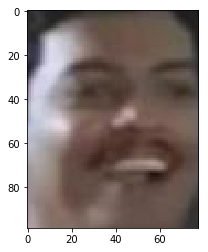

In [25]:
imshow(image)

In [26]:
print train.class[i]

SyntaxError: invalid syntax (<ipython-input-26-78dec1ddfcc9>, line 1)

In [27]:
train.describe()

,ID,Class
count,19906,19906
unique,19906,3
top,25628.jpg,MIDDLE
freq,1,10804


In [28]:
print train.Class[i]

YOUNG


In [29]:
print train.ID

0          377.jpg
1        17814.jpg
2        21283.jpg
3        16496.jpg
4         4487.jpg
5         6283.jpg
6        23495.jpg
7         7100.jpg
8         6028.jpg
9        22617.jpg
10       11177.jpg
11        2462.jpg
12       24116.jpg
13       17689.jpg
14         728.jpg
15        3003.jpg
16       14408.jpg
17        6679.jpg
18       15152.jpg
19       24784.jpg
20        9970.jpg
21       22550.jpg
22         150.jpg
23        7379.jpg
24       15387.jpg
25        2336.jpg
26        9603.jpg
27        4025.jpg
28       17696.jpg
29       17552.jpg
           ...    
19876    11988.jpg
19877     9407.jpg
19878    25426.jpg
19879    16609.jpg
19880    18746.jpg
19881    25714.jpg
19882    14939.jpg
19883    10025.jpg
19884     6149.jpg
19885     9733.jpg
19886    22630.jpg
19887    11803.jpg
19888    10812.jpg
19889     7038.jpg
19890     3021.jpg
19891     4727.jpg
19892     7979.jpg
19893    26159.jpg
19894     2040.jpg
19895    25347.jpg
19896    15100.jpg
19897    261

In [30]:
 ######### Making train_x ############33
    
from scipy.misc import imresize

temp = []

for image_name in train.ID:
      image_path = 'data/train/Train/'+image_name
      image = imread(image_path)
      image = imresize(image,(32,32))
      image = image.astype('float32') 
      temp.append(image)
        
train_x = np.stack(temp)        


KeyboardInterrupt: 

In [ ]:
########## Making test_x ############
temp = []
for image_name in test.ID:
     image_path = 'data/test/Test/'+image_name
     image = imread(image_path) #########  Here the function " imread " returns a numpy array , given a .jpg image  #######
     image = imresize(image,(32,32))
     temp.append(image.astype('float32')) 
    
test_x = np.stack(temp)   

In [32]:
print train_x.shape,test_x.shape

train_x = np.reshape(train_x,(19906,32*32*3))
test_x = np.reshape(test_x,(6636,32*32*3))

print train_x.shape,test_x.shape


train_x = train_x / 255
test_x = test_x/255


(19906, 32, 32, 3) (6636, 32, 32, 3)
(19906, 3072) (6636, 3072)


In [33]:
################# Let's see what is the distribution of ages in the training dataset ###################
train.Class.value_counts(normalize = True)

MIDDLE    0.542751
YOUNG     0.336883
OLD       0.120366
Name: Class, dtype: float64

In [34]:
########## So we see that the majority people in the training data are MIDDLE aged ###########
##### so a naive submission will be that since the majority of the people in the training set are MIDDLE aged , so we assume
######### all test data people are also MIDDLE aged.
test.describe()

,ID
count,6636
unique,6636
top,23251.jpg
freq,1


In [35]:
test.describe

<bound method DataFrame.describe of              ID
0     25321.jpg
1       989.jpg
2     19277.jpg
3     13093.jpg
4      5367.jpg
5     19851.jpg
6     10384.jpg
7     24567.jpg
8      2029.jpg
9      4956.jpg
10    26131.jpg
11    17407.jpg
12    11136.jpg
13    23038.jpg
14     6333.jpg
15    25076.jpg
16    22102.jpg
17    12396.jpg
18    24719.jpg
19    21354.jpg
20    15362.jpg
21    10415.jpg
22     5295.jpg
23     5531.jpg
24    16784.jpg
25    22442.jpg
26    16794.jpg
27    11261.jpg
28    11540.jpg
29    24286.jpg
...         ...
6606  13841.jpg
6607   8999.jpg
6608  15780.jpg
6609  10241.jpg
6610  13006.jpg
6611  20322.jpg
6612  24054.jpg
6613  21310.jpg
6614  24707.jpg
6615   3292.jpg
6616  18392.jpg
6617   7731.jpg
6618  26522.jpg
6619  25614.jpg
6620  11283.jpg
6621   1485.jpg
6622  15057.jpg
6623   9582.jpg
6624  10634.jpg
6625  15146.jpg
6626  16049.jpg
6627  13461.jpg
6628    147.jpg
6629  22636.jpg
6630   6512.jpg
6631   1876.jpg
6632  14940.jpg
6633   3638.jpg
6634

In [36]:
test['Class']='MIDDLE'

In [37]:
test.describe()

,ID,Class
count,6636,6636
unique,6636,1
top,23251.jpg,MIDDLE
freq,1,6636


In [38]:
######################### FIRST SUBISSION ################

test.to_csv('sub1.csv',index = False)

In [39]:
########################## SECOND MODEL : USING  SIMPLE NEURAL NETWORKS (SNNs)  FOR CLASSIFICATION ######################

In [40]:
import keras

Using TensorFlow backend.


In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
# LabelEncoder() function is in sklearn.preprocessing.LableEcoder class
# The function of LabelEncoder is to convert a list of categorical values to encoded numerical list.
# The function of the keras.utils.np_utils.to_categorical() is to convert the above encoded numerical list to one-hot 
# representation matrix

lb = LabelEncoder()
train_y = lb.fit_transform(train.Class)
train_y = keras.utils.np_utils.to_categorical(train_y)

In [43]:
train_y

array([[ 1.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       ..., 
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.]])

In [44]:
# what we did above ##

#######################
#######################
# We can do this by first encoding the strings consistently to integers using the scikit-learn class LabelEncoder. 
# Then convert the vector of integers to a one hot encoding using the Keras function to_categorical().
#######################
#######################


In [45]:
##### BUILDING THE MODEL ITSELF #########

###### Parameters for the model ############
input_num_units = (32, 32, 3)
hidden_num_units = 500
output_num_classes = 3

epochs = 5
batch_size = 128

###### importing keras modules to be able to build the model ###########
from keras.models import Sequential
from keras.layers import Dense


In [46]:
model = Sequential()
model.add(Dense(output_dim=hidden_num_units, input_dim=32*32*3,activation='relu'))
model.add(Dense(output_dim=output_num_classes,activation='softmax'))


In [47]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 500)           1536500     dense_input_1[0][0]              
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 3)             1503        dense_1[0][0]                    
Total params: 1,538,003
Trainable params: 1,538,003
Non-trainable params: 0
____________________________________________________________________________________________________


In [48]:
train_x.shape
train_y.shape

(19906, 3)

In [49]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_x, train_y, batch_size=batch_size,nb_epoch=5,verbose=1)


Epoch 1/5
19906/19906 [==============================] - 7s - loss: 0.8928 - acc: 0.5766     
Epoch 2/5
19906/19906 [==============================] - 7s - loss: 0.8432 - acc: 0.6047     
Epoch 3/5
19906/19906 [==============================] - 8s - loss: 0.8251 - acc: 0.6158     
Epoch 4/5
19906/19906 [==============================] - 7s - loss: 0.8118 - acc: 0.6290     
Epoch 5/5
19906/19906 [==============================] - 7s - loss: 0.8061 - acc: 0.6263     


In [80]:
model.fit(train_x, train_y, batch_size=batch_size,nb_epoch=epochs,verbose=1, validation_split=0.2)

Train on 15924 samples, validate on 3982 samples
Epoch 1/5
15924/15924 [==============================] - 6s - loss: 0.8053 - acc: 0.6253 - val_loss: 0.7849 - val_acc: 0.6366
Epoch 2/5
15924/15924 [==============================] - 6s - loss: 0.7953 - acc: 0.6370 - val_loss: 0.7861 - val_acc: 0.6366
Epoch 3/5
15924/15924 [==============================] - 7s - loss: 0.7933 - acc: 0.6355 - val_loss: 0.7755 - val_acc: 0.6522
Epoch 4/5
15924/15924 [==============================] - 6s - loss: 0.7905 - acc: 0.6375 - val_loss: 0.7958 - val_acc: 0.6351
Epoch 5/5
15924/15924 [==============================] - 6s - loss: 0.7875 - acc: 0.6409 - val_loss: 0.7852 - val_acc: 0.6479


In [81]:
prediction = model.predict_classes(test_x)

6560/6636 [============================>.] - ETA: 0s

In [82]:
prediction = lb.inverse_transform(prediction)

In [83]:
test['Class']=prediction

In [84]:
test.to_csv('sub2.csv',index = False)

In [45]:
######## now using our final model ....CNN to classify these images ages 
train_x = train_x.reshape(-1,32,32,3)
test_x = test_x.reshape(-1,32,32,3)


In [46]:
train_x.shape
train_y.shape

(19906, 3)

In [65]:
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, 2, 2, input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, 2, 2))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 2, 2))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(96))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))



In [66]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [68]:
model.fit(train_x, train_y, batch_size=batch_size,nb_epoch=10,verbose=1)

Epoch 1/10
19906/19906 [==============================] - 26s - loss: 0.6805 - acc: 0.7038    
Epoch 2/10
19906/19906 [==============================] - 25s - loss: 0.6663 - acc: 0.7140    
Epoch 3/10
19906/19906 [==============================] - 25s - loss: 0.6444 - acc: 0.7255    
Epoch 4/10
19906/19906 [==============================] - 26s - loss: 0.6252 - acc: 0.7356    
Epoch 5/10
19906/19906 [==============================] - 26s - loss: 0.6140 - acc: 0.7395    
Epoch 6/10
19906/19906 [==============================] - 26s - loss: 0.5960 - acc: 0.7449    
Epoch 7/10
19906/19906 [==============================] - 25s - loss: 0.5849 - acc: 0.7532    
Epoch 8/10
19906/19906 [==============================] - 25s - loss: 0.5714 - acc: 0.7568    
Epoch 9/10
19906/19906 [==============================] - 26s - loss: 0.5604 - acc: 0.7618    
Epoch 10/10
19906/19906 [==============================] - 26s - loss: 0.5514 - acc: 0.7681    


In [69]:
prediction = model.predict_classes(test_x)
prediction = lb.inverse_transform(prediction)
test['Class']=prediction
test.to_csv('sub3.csv',index = False)

6624/6636 [============================>.] - ETA: 0s

In [48]:
########################## Building a more robust CNN model using ImageDataGenerator() ####################33

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,zca_whitening=True,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

datagen.fit(train_x)

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, 2, 2, input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, 2, 2))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 2, 2))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(96))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))

# the model so far outputs 3D feature maps (height, width, features)

In [49]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [50]:
model.fit_generator(
        datagen.flow(train_x, train_y, batch_size=128),
        samples_per_epoch=train_x.shape[0],
        nb_epoch=10)
model.save_weights('first_try.h5')

Epoch 1/10
19906/19906 [==============================] - 78s - loss: 0.9708 - acc: 0.5377    
Epoch 2/10
19906/19906 [==============================] - 79s - loss: 0.9235 - acc: 0.5685    
Epoch 3/10
19906/19906 [==============================] - 78s - loss: 0.9034 - acc: 0.5888    
Epoch 4/10
19906/19906 [==============================] - 78s - loss: 0.8772 - acc: 0.6055    
Epoch 5/10
19906/19906 [==============================] - 78s - loss: 0.8590 - acc: 0.6103    
Epoch 6/10
19906/19906 [==============================] - 79s - loss: 0.8501 - acc: 0.6137    
Epoch 7/10
19906/19906 [==============================] - 79s - loss: 0.8325 - acc: 0.6215    
Epoch 8/10
19906/19906 [==============================] - 78s - loss: 0.8291 - acc: 0.6252    
Epoch 9/10
19906/19906 [==============================] - 78s - loss: 0.8178 - acc: 0.6349    
Epoch 10/10
19906/19906 [==============================] - 78s - loss: 0.8044 - acc: 0.6396    


In [51]:
#################### so now we use  some transfer learning ########################

In [124]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
model = VGG16(weights='imagenet', include_top=False,input_shape = (50,50,3))
model.summary()
model.layers.pop()
model.layers.pop()
model.layers.pop()
model.layers.pop()
model.layers.pop()
model.layers.pop()
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_5 (InputLayer)             (None, 50, 50, 3)     0                                            
____________________________________________________________________________________________________
block1_conv1 (Convolution2D)     (None, 50, 50, 64)    1792        input_5[0][0]                    
____________________________________________________________________________________________________
block1_conv2 (Convolution2D)     (None, 50, 50, 64)    36928       block1_conv1[0][0]               
____________________________________________________________________________________________________
block1_pool (MaxPooling2D)       (None, 25, 25, 64)    0           block1_conv2[0][0]               
___________________________________________________________________________________________

In [125]:
train.describe

<bound method DataFrame.describe of               ID   Class
0        377.jpg  MIDDLE
1      17814.jpg   YOUNG
2      21283.jpg  MIDDLE
3      16496.jpg   YOUNG
4       4487.jpg  MIDDLE
5       6283.jpg  MIDDLE
6      23495.jpg   YOUNG
7       7100.jpg   YOUNG
8       6028.jpg   YOUNG
9      22617.jpg     OLD
10     11177.jpg   YOUNG
11      2462.jpg  MIDDLE
12     24116.jpg  MIDDLE
13     17689.jpg  MIDDLE
14       728.jpg  MIDDLE
15      3003.jpg  MIDDLE
16     14408.jpg     OLD
17      6679.jpg   YOUNG
18     15152.jpg     OLD
19     24784.jpg  MIDDLE
20      9970.jpg   YOUNG
21     22550.jpg     OLD
22       150.jpg   YOUNG
23      7379.jpg  MIDDLE
24     15387.jpg  MIDDLE
25      2336.jpg   YOUNG
26      9603.jpg  MIDDLE
27      4025.jpg     OLD
28     17696.jpg  MIDDLE
29     17552.jpg   YOUNG
...          ...     ...
19876  11988.jpg     OLD
19877   9407.jpg     OLD
19878  25426.jpg   YOUNG
19879  16609.jpg   YOUNG
19880  18746.jpg   YOUNG
19881  25714.jpg  MIDDLE
19882  14939.j

In [126]:
 ############ Making train_x ##############   
from keras.preprocessing import image
temp = []

for i,image_name in enumerate(train.ID):
      image_path = 'data/train/Train/'+image_name
      im = image.load_img(image_path,target_size = (50,50))
      im = image.img_to_array(im)
      #im = np.expand_dims(im,axis =0)
      #im = im.astype('float32') 
      temp.append(im)
        
train_x = np.array(temp)     


######### Making test_x ############
temp = []
for image_name in test.ID:
     image_path = 'data/test/Test/'+image_name
     im = image.load_img(image_path,target_size = (50,50))
     im = image.img_to_array(im)
     #im = np.expand_dims(im,axis =0)
     #im = im.astype('float32') 
     temp.append(im)    
     
test_x = np.array(temp) 

In [127]:

train_x = preprocess_input(train_x)

features_train=model.predict(train_x)
# Extracting features from the train dataset using the VGG16 pre-trained model
test_x = preprocess_input(test_x)
features_test=model.predict(test_x)

In [128]:
train_x.shape

(19906, 50, 50, 3)

In [129]:
features_test.shape

(6636, 1, 1, 512)

In [130]:
train_x = features_train.reshape(19906,6*6*512)

ValueError: cannot reshape array of size 10191872 into shape (19906,18432)

In [ ]:
test_x = features_test.reshape(6636,6*6*512)

In [ ]:
train_y=np.asarray(train['Class'])
# performing one-hot encoding for the target variable

train_y=pd.get_dummies(train_y)
train_y=np.array(train_y)
# creating training and validation set

from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid=train_test_split(train_x,train_y,test_size=0.3, random_state=30)

In [118]:
########## Now adding a layer a the end layers according to our data ############

# creating a mlp model
from keras.models import Sequential
from keras.layers import Dense, Activation
model=Sequential()

model.add(Dense(200, input_dim=512, activation='relu'))
keras.layers.core.Dropout(0.8, noise_shape=None, seed=None)

model.add(Dense(64,input_dim=200,activation='sigmoid'))
keras.layers.core.Dropout(0.8, noise_shape=None, seed=None)


model.add(Dense(3,input_dim = 64,activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])



In [119]:
model.fit(X_train, Y_train, nb_epoch=20, batch_size=100,validation_data=(X_valid,Y_valid))

Train on 13934 samples, validate on 5972 samples
Epoch 1/20
13934/13934 [==============================] - ETA: 0s - loss: 0.8560 - acc: 0.615 - 1s - loss: 0.8543 - acc: 0.6160 - val_loss: 0.8016 - val_acc: 0.6480
Epoch 2/20
13934/13934 [==============================] - 0s - loss: 0.7588 - acc: 0.6636 - val_loss: 0.7792 - val_acc: 0.6525
Epoch 3/20
13934/13934 [==============================] - 0s - loss: 0.7133 - acc: 0.6895 - val_loss: 0.7558 - val_acc: 0.6693
Epoch 4/20
13934/13934 [==============================] - 0s - loss: 0.6645 - acc: 0.7119 - val_loss: 0.7490 - val_acc: 0.6750
Epoch 5/20
13934/13934 [==============================] - 0s - loss: 0.6076 - acc: 0.7415 - val_loss: 0.7739 - val_acc: 0.6680
Epoch 6/20
13934/13934 [==============================] - 0s - loss: 0.5657 - acc: 0.7639 - val_loss: 0.7571 - val_acc: 0.6815
Epoch 7/20
13934/13934 [==============================] - 0s - loss: 0.5042 - acc: 0.7911 - val_loss: 0.7655 - val_acc: 0.6824
Epoch 8/20
13934/13934 [